# importing_libraries

In [223]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.width', 100)
pd.set_option('display.max_columns', 100)
pd.options.display.float_format = '{:.2f}'.format

# data_wrangling

In [224]:
df = pd.read_csv(r"E:\ecommerce_dataset\data.csv", encoding='unicode_escape',index_col="InvoiceNo")

# data_inspection

In [225]:
df.head(10)

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
InvoiceNo,,,,,,,
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.00,United Kingdom
536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.00,United Kingdom
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.00,United Kingdom
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.00,United Kingdom
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.00,United Kingdom
536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.00,United Kingdom
536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.00,United Kingdom
536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.00,United Kingdom
536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.00,United Kingdom


In [226]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.00,541909.00,406829.00
mean,9.55,4.61,15287.69
std,218.08,96.76,1713.60
min,-80995.00,-11062.06,12346.00
25%,1.00,1.25,13953.00
50%,3.00,2.08,15152.00
75%,10.00,4.13,16791.00
max,80995.00,38970.00,18287.00


In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541909 entries, 536365 to 581587
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   StockCode    541909 non-null  object 
 1   Description  540455 non-null  object 
 2   Quantity     541909 non-null  int64  
 3   InvoiceDate  541909 non-null  object 
 4   UnitPrice    541909 non-null  float64
 5   CustomerID   406829 non-null  float64
 6   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [228]:
df["Invoice_Date"]=df["InvoiceDate"].astype('datetime64[ns]') #splitting date to a new columns

In [229]:
df['day'] = df['Invoice_Date'].dt.day
df['month'] = df['Invoice_Date'].dt.month
df['year'] = df['Invoice_Date'].dt.year
df['hour'] = df['Invoice_Date'].dt.hour

In [230]:
df.head(20)

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Date,day,month,year,hour
InvoiceNo,,,,,,,,,,,,
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.00,United Kingdom,2010-12-01 08:26:00,1,12,2010,8
536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.00,United Kingdom,2010-12-01 08:26:00,1,12,2010,8
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.00,United Kingdom,2010-12-01 08:26:00,1,12,2010,8
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.00,United Kingdom,2010-12-01 08:26:00,1,12,2010,8
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.00,United Kingdom,2010-12-01 08:26:00,1,12,2010,8
536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.00,United Kingdom,2010-12-01 08:26:00,1,12,2010,8
536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.00,United Kingdom,2010-12-01 08:26:00,1,12,2010,8
536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.00,United Kingdom,2010-12-01 08:28:00,1,12,2010,8
536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.00,United Kingdom,2010-12-01 08:28:00,1,12,2010,8


In [231]:
df.isna().sum(axis=0)

StockCode            0
Description       1454
Quantity             0
InvoiceDate          0
UnitPrice            0
CustomerID      135080
Country              0
Invoice_Date         0
day                  0
month                0
year                 0
hour                 0
dtype: int64

In [232]:
df.columns

Index(['StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country',
       'Invoice_Date', 'day', 'month', 'year', 'hour'],
      dtype='object')

In [233]:
df.drop(columns="InvoiceDate",inplace=True)

# dealing_with_duplicates

# inspect_duplicates and make a csv file for them 

In [234]:
duplicates=df[df.duplicated(keep=False)]

In [235]:
#duplicates.to_csv("C:/Users/20114/OneDrive/Documents/GitHub/E-Commerce_EDA/dplicates.csv")

In [236]:
df.drop_duplicates(keep="first",inplace=True)

In [237]:
df.shape #check

(536061, 11)

In [238]:
df.head()

,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Invoice_Date,day,month,year,hour
InvoiceNo,,,,,,,,,,,
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.00,United Kingdom,2010-12-01 08:26:00,1,12,2010,8
536365,71053,WHITE METAL LANTERN,6,3.39,17850.00,United Kingdom,2010-12-01 08:26:00,1,12,2010,8
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.00,United Kingdom,2010-12-01 08:26:00,1,12,2010,8
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.00,United Kingdom,2010-12-01 08:26:00,1,12,2010,8
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.00,United Kingdom,2010-12-01 08:26:00,1,12,2010,8


In [239]:
df[df["CustomerID"].isnull()] 

,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Invoice_Date,day,month,year,hour
InvoiceNo,,,,,,,,,,,
536414,22139,NaN,56,0.00,NaN,United Kingdom,2010-12-01 11:52:00,1,12,2010,11
536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2.51,NaN,United Kingdom,2010-12-01 14:32:00,1,12,2010,14
536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2.51,NaN,United Kingdom,2010-12-01 14:32:00,1,12,2010,14
536544,21786,POLKADOT RAIN HAT,4,0.85,NaN,United Kingdom,2010-12-01 14:32:00,1,12,2010,14
536544,21787,RAIN PONCHO RETROSPOT,2,1.66,NaN,United Kingdom,2010-12-01 14:32:00,1,12,2010,14
...,...,...,...,...,...,...,...,...,...,...,...
581498,85099B,JUMBO BAG RED RETROSPOT,5,4.13,NaN,United Kingdom,2011-12-09 10:26:00,9,12,2011,10
581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,4.13,NaN,United Kingdom,2011-12-09 10:26:00,9,12,2011,10
581498,85150,LADIES & GENTLEMEN METAL SIGN,1,4.96,NaN,United Kingdom,2011-12-09 10:26:00,9,12,2011,10


# lets see the outliers before analysis

In [240]:
import seaborn as sns

# anlyzing outliers

## 1- quantity_outliers

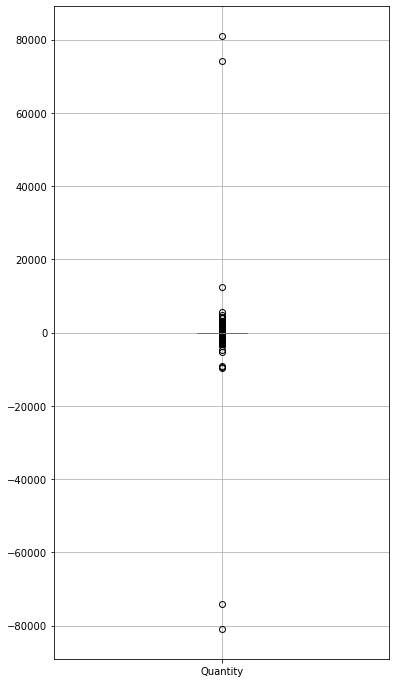

In [241]:
plt.figure(figsize = (6,12))
df.boxplot("Quantity")
plt.show()

In [242]:
quantity_outliers=df[(df["Quantity"]>20000) | (df["Quantity"]<0)] # save it to csv file and a new data frame to analyze it separately

In [243]:
len(quantity_outliers)

10587

In [244]:
#quantity_outliers.to_csv("C:/Users/20114/OneDrive/Documents/GitHub/E-Commerce_EDA/quantity_outliers.csv")

In [245]:
quantity_outliers.head(20)

,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Invoice_Date,day,month,year,hour
InvoiceNo,,,,,,,,,,,
C536379,D,Discount,-1,27.50,14527.00,United Kingdom,2010-12-01 09:41:00,1,12,2010,9
C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,4.65,15311.00,United Kingdom,2010-12-01 09:49:00,1,12,2010,9
C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,1.65,17548.00,United Kingdom,2010-12-01 10:24:00,1,12,2010,10
C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,0.29,17548.00,United Kingdom,2010-12-01 10:24:00,1,12,2010,10
C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,0.29,17548.00,United Kingdom,2010-12-01 10:24:00,1,12,2010,10
C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,0.29,17548.00,United Kingdom,2010-12-01 10:24:00,1,12,2010,10
C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,3.45,17548.00,United Kingdom,2010-12-01 10:24:00,1,12,2010,10
C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,1.65,17548.00,United Kingdom,2010-12-01 10:24:00,1,12,2010,10
C536391,22553,PLASTERS IN TIN SKULLS,-24,1.65,17548.00,United Kingdom,2010-12-01 10:24:00,1,12,2010,10


In [246]:
quantity_outliers["CustomerID"].value_counts() # customers and their outliers

14911.00    226
17841.00    136
17511.00    113
15311.00    112
12607.00    101
           ... 
12594.00      1
15906.00      1
17676.00      1
14256.00      1
15147.00      1
Name: CustomerID, Length: 1589, dtype: int64

In [247]:
quantity_outliers["StockCode"].value_counts() # products and their outliers

M         244
22423     183
POST      126
22960      87
D          77
         ... 
22821       1
35966       1
21319       1
47591B      1
23061       1
Name: StockCode, Length: 2559, dtype: int64

In [248]:
quantity_outliers.loc[quantity_outliers.Quantity > 10000] # its ok (high amount order)

,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Invoice_Date,day,month,year,hour
InvoiceNo,,,,,,,,,,,
541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1.04,12346.00,United Kingdom,2011-01-18 10:01:00,18,1,2011,10
581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2.08,16446.00,United Kingdom,2011-12-09 09:15:00,9,12,2011,9


## 2- unitprice_outliers

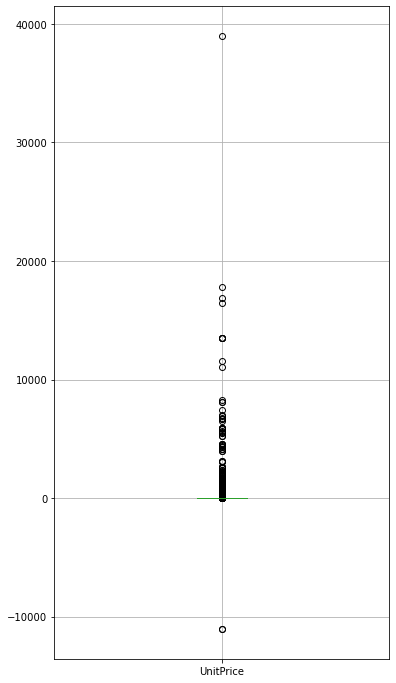

In [249]:
plt.figure(figsize = (6,12))
df.boxplot("UnitPrice")
plt.show()

In [250]:
unitprice_outliers=df[(df["UnitPrice"]>10000) | (df["UnitPrice"]<0)] # save it to csv file and a new data frame to analyze it separately

In [251]:
 len(unitprice_outliers)

12

In [252]:
#unitprice_outliers.to_csv("C:/Users/20114/OneDrive/Documents/GitHub/E-Commerce_EDA/unitprice_outliers.csv")

In [253]:
unitprice_outliers.head(20)

,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Invoice_Date,day,month,year,hour
InvoiceNo,,,,,,,,,,,
C537630,AMAZONFEE,AMAZON FEE,-1,13541.33,NaN,United Kingdom,2010-12-07 15:04:00,7,12,2010,15
537632,AMAZONFEE,AMAZON FEE,1,13541.33,NaN,United Kingdom,2010-12-07 15:08:00,7,12,2010,15
C537644,AMAZONFEE,AMAZON FEE,-1,13474.79,NaN,United Kingdom,2010-12-07 15:34:00,7,12,2010,15
C537651,AMAZONFEE,AMAZON FEE,-1,13541.33,NaN,United Kingdom,2010-12-07 15:49:00,7,12,2010,15
C540117,AMAZONFEE,AMAZON FEE,-1,16888.02,NaN,United Kingdom,2011-01-05 09:55:00,5,1,2011,9
C540118,AMAZONFEE,AMAZON FEE,-1,16453.71,NaN,United Kingdom,2011-01-05 09:57:00,5,1,2011,9
C556445,M,Manual,-1,38970.00,15098.00,United Kingdom,2011-06-10 15:31:00,10,6,2011,15
A563185,B,Adjust bad debt,1,11062.06,NaN,United Kingdom,2011-08-12 14:50:00,12,8,2011,14
A563186,B,Adjust bad debt,1,-11062.06,NaN,United Kingdom,2011-08-12 14:51:00,12,8,2011,14


In [254]:
unitprice_outliers.loc[(unitprice_outliers.UnitPrice < 0)|(unitprice_outliers.UnitPrice > 10000)] # its ok (bad debt & fees adjustment) i will analyze it 

,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Invoice_Date,day,month,year,hour
InvoiceNo,,,,,,,,,,,
C537630,AMAZONFEE,AMAZON FEE,-1,13541.33,NaN,United Kingdom,2010-12-07 15:04:00,7,12,2010,15
537632,AMAZONFEE,AMAZON FEE,1,13541.33,NaN,United Kingdom,2010-12-07 15:08:00,7,12,2010,15
C537644,AMAZONFEE,AMAZON FEE,-1,13474.79,NaN,United Kingdom,2010-12-07 15:34:00,7,12,2010,15
C537651,AMAZONFEE,AMAZON FEE,-1,13541.33,NaN,United Kingdom,2010-12-07 15:49:00,7,12,2010,15
C540117,AMAZONFEE,AMAZON FEE,-1,16888.02,NaN,United Kingdom,2011-01-05 09:55:00,5,1,2011,9
C540118,AMAZONFEE,AMAZON FEE,-1,16453.71,NaN,United Kingdom,2011-01-05 09:57:00,5,1,2011,9
C556445,M,Manual,-1,38970.00,15098.00,United Kingdom,2011-06-10 15:31:00,10,6,2011,15
A563185,B,Adjust bad debt,1,11062.06,NaN,United Kingdom,2011-08-12 14:50:00,12,8,2011,14
A563186,B,Adjust bad debt,1,-11062.06,NaN,United Kingdom,2011-08-12 14:51:00,12,8,2011,14


In [255]:
unit_price_zero = df[(df["UnitPrice"]==0)] 

In [256]:
#unit_price_zero.to_csv("C:/Users/20114/OneDrive/Documents/GitHub/E-Commerce_EDA/unit_price_zero.csv") # getting unit prices = 0

# creating clean dataframe

### firstly concatenate all dirty data together

In [257]:
dirty = df.index[(df.UnitPrice<=0)|(df.Quantity<=0)]

In [258]:
df.head(10)

,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Invoice_Date,day,month,year,hour
InvoiceNo,,,,,,,,,,,
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.00,United Kingdom,2010-12-01 08:26:00,1,12,2010,8
536365,71053,WHITE METAL LANTERN,6,3.39,17850.00,United Kingdom,2010-12-01 08:26:00,1,12,2010,8
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.00,United Kingdom,2010-12-01 08:26:00,1,12,2010,8
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.00,United Kingdom,2010-12-01 08:26:00,1,12,2010,8
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.00,United Kingdom,2010-12-01 08:26:00,1,12,2010,8
536365,22752,SET 7 BABUSHKA NESTING BOXES,2,7.65,17850.00,United Kingdom,2010-12-01 08:26:00,1,12,2010,8
536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,4.25,17850.00,United Kingdom,2010-12-01 08:26:00,1,12,2010,8
536366,22633,HAND WARMER UNION JACK,6,1.85,17850.00,United Kingdom,2010-12-01 08:28:00,1,12,2010,8
536366,22632,HAND WARMER RED POLKA DOT,6,1.85,17850.00,United Kingdom,2010-12-01 08:28:00,1,12,2010,8


In [259]:
clean=df.drop(dirty) # we removed unnecessary data in order to make true insights (assume they are truly dirty)

In [260]:
clean["Revenue"]=clean["Quantity"]*clean["UnitPrice"] # make anew column with revenue 

C:\Users\20114\AppData\Local\Temp/ipykernel_8164/666539363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean["Revenue"]=clean["Quantity"]*clean["UnitPrice"] # make anew column with revenue


In [261]:
clean.head()

,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Invoice_Date,day,month,year,hour,Revenue
InvoiceNo,,,,,,,,,,,,
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.00,United Kingdom,2010-12-01 08:26:00,1,12,2010,8,15.30
536365,71053,WHITE METAL LANTERN,6,3.39,17850.00,United Kingdom,2010-12-01 08:26:00,1,12,2010,8,20.34
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.00,United Kingdom,2010-12-01 08:26:00,1,12,2010,8,22.00
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.00,United Kingdom,2010-12-01 08:26:00,1,12,2010,8,20.34
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.00,United Kingdom,2010-12-01 08:26:00,1,12,2010,8,20.34


In [262]:
clean.describe()

,Quantity,UnitPrice,CustomerID,day,month,year,hour,Revenue
count,521582.00,521582.00,392099.00,521582.00,521582.00,521582.00,521582.00,521582.00
mean,10.64,3.90,15289.85,15.03,7.55,2010.92,13.07,20.21
std,156.77,36.07,1712.95,8.67,3.50,0.27,2.44,272.43
min,1.00,0.00,12346.00,1.00,1.00,2010.00,6.00,0.00
25%,1.00,1.25,13959.00,7.00,5.00,2011.00,11.00,3.90
50%,4.00,2.08,15152.00,15.00,8.00,2011.00,13.00,9.95
75%,12.00,4.13,16794.00,22.00,11.00,2011.00,15.00,17.70
max,80995.00,13541.33,18287.00,31.00,12.00,2011.00,20.00,168469.60


## lets make some insights

### what are the top revenue & sales countries

In [263]:
clean.groupby("Country")[["Quantity","Revenue"]].sum().sort_values(by=["Revenue","Quantity"],ascending=False)

,Quantity,Revenue
Country,,
United Kingdom,4626906,8910878.28
Netherlands,200361,285446.34
EIRE,145640,280867.15
Germany,119011,227634.70
France,111966,209364.89
Australia,83047,136710.77
Spain,27269,60746.66
Switzerland,30421,56398.35
Belgium,23237,41196.34


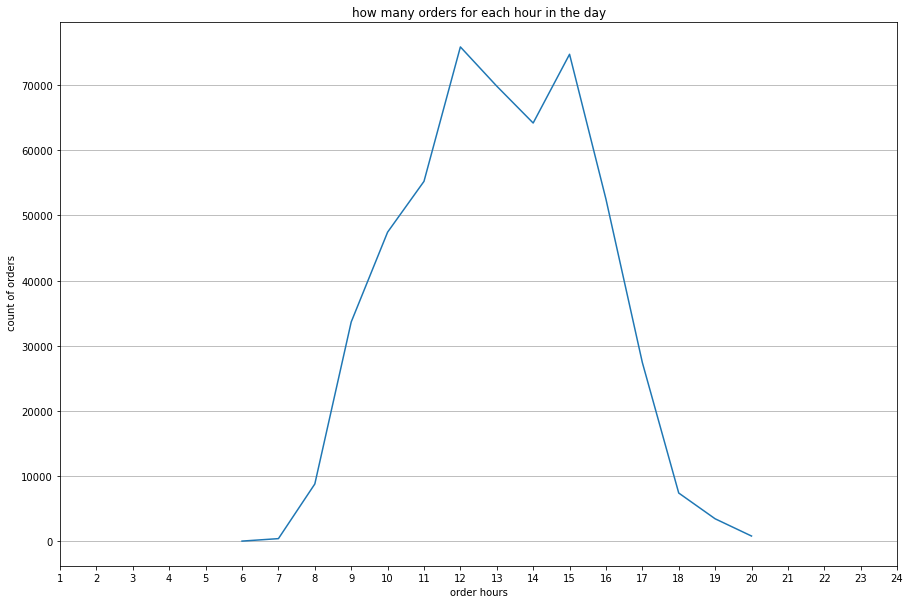

In [264]:
hours = [hour for hour , clean in clean.groupby("hour")]
hours2=range(1,25)
plt.figure(figsize=(15,10))
plt.plot(hours,clean.groupby("hour")["Country"].count())
plt.xticks(hours2)
plt.title("how many orders for each hour in the day")
plt.xlabel("order hours")
plt.ylabel(" count of orders")
plt.grid(axis="y")
plt.show()

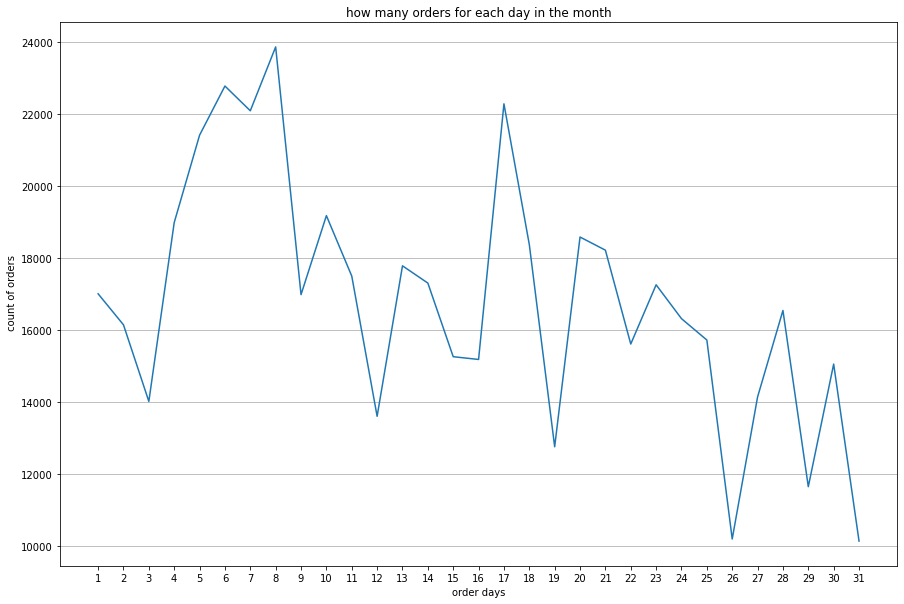

In [265]:
days = [day for day , clean in clean.groupby("day")]

plt.figure(figsize=(15,10))
plt.plot(days,clean.groupby("day")["Country"].count())
plt.xticks(days)
plt.xlabel("order days")
plt.ylabel(" count of orders")
plt.title("how many orders for each day in the month")
plt.grid(axis="y")
plt.show()

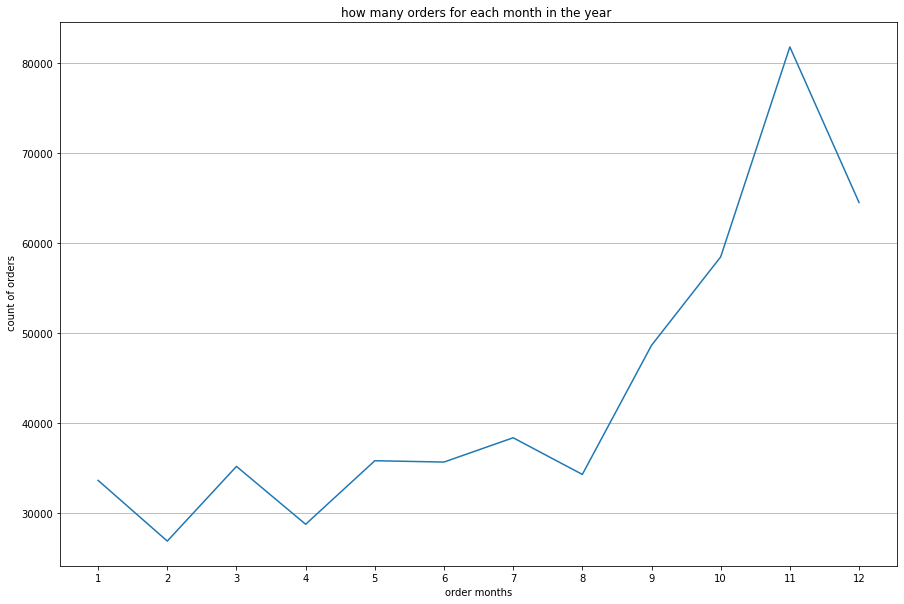

In [267]:
months = [month for month , clean in clean.groupby("month")]
months_range=range(1,13)
plt.figure(figsize=(15,10))
plt.plot(months,clean.groupby("month")["Country"].count())
plt.xticks(months_range)
plt.xlabel("order months")
plt.ylabel(" count of orders")
plt.title("how many orders for each month in the year ")
plt.grid(axis="y")
plt.show()